In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.rcParams["figure.figsize"] = (8,6)
from sklearn.preprocessing import PolynomialFeatures


In [3]:
def choice(data):
    data2 = data.loc[data['Program'] == 'P11', :]
    y = data2.loc[data2["enter Fall"] == 2018, :].iloc[:, 3:].values.reshape(-1, 1)
    x = np.arange(1, 53)
    x = np.array(x).reshape(-1, 1)
    print(x.shape, y.shape)
    rmses = []
    degrees = np.arange(1, 10)
    for k in degrees:
        poly = PolynomialFeatures(degree=k)  # adding n characters
        x2 = poly.fit_transform(x)
        poly_reg = LinearRegression()
        poly_reg.fit(x2, y)
        y_test_pred = poly_reg.predict(x2)
        poly_rmse = mean_squared_error(y, y_test_pred)
        rmses.append(poly_rmse)
    plt.plot(degrees, rmses)
    plt.xlabel('degree')
    plt.ylabel("MSE")
    plt.show()
#     choose elbow 3




In [4]:
def predict(data):
    poly = PolynomialFeatures(degree=3)
    zy = ['P03','P04','P05','P06','P07','P08','P09','P10','P11','P12','P13','P14','P15','P16','P17']
    for m in zy:
        data1 = data.loc[data['Program'] == '{}'.format(m), :]
        y_pr = []
        y_max =[]
        now = data1.loc[data1["enter Fall"] == 2022, :].iloc[:,3:].values
        for n in range(2018,2022):
            y = data1.loc[data1["enter Fall"] == n, :].iloc[:,3:].values
            y_max.append(y.max())
            x = np.arange(1,53)
            x = np.array(x).reshape(1, -1)
            poly.fit(x)   
            X2 = poly.transform(x)  # generate poly coefficient for each X
            
            # training
            lin_reg = LinearRegression()
            lin_reg.fit(X2, y)  # fit using linearRegression
            y_pred = lin_reg.predict(X2) #predict
            y_pr.append(y_pred)
            col = {2018:'darkgray',2019:'goldenrod',2020:'darkkhaki',2021:'tan'}
            plt.scatter(x, y, color = '{}'.format(col[n]), label='{}'.format(n))
        y_sum = sum(y_max)
        f_y = 0
        for t in range(4):
            s =np.around(y_pr[t] * (y_max[t].reshape(-1,1)) /y_sum)
            f_y+=s
        
        # plot 2022 recorded
        plt.scatter(range(1,53),now,s=80,color = 'tomato',label = '2022')
        
        #plot 2022 prediction
        plt.scatter(range(1,53), f_y, s=100,color = 'darkblue',marker='x',label = '2022_projected')
        plt.xlabel('Cycle Week')
        plt.ylabel("Numbers")
        plt.legend(loc='upper left')
        plt.title(m)
        plt.show()
        

(52, 1) (52, 1)


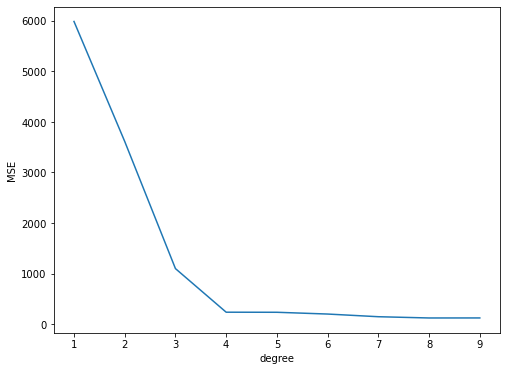

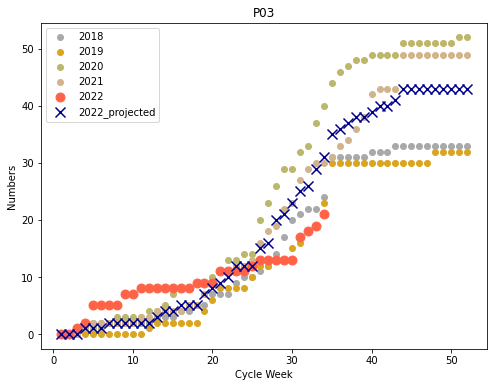

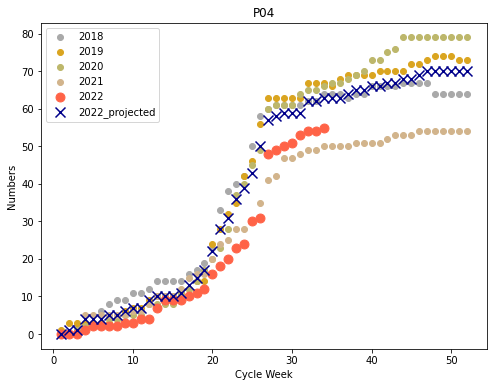

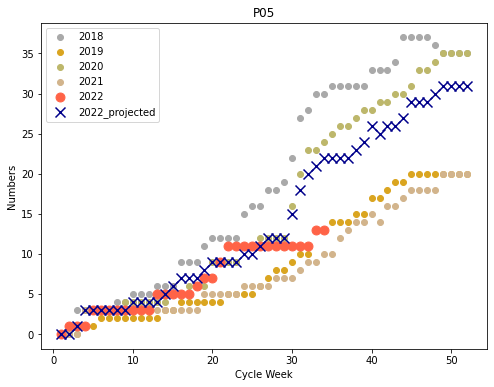

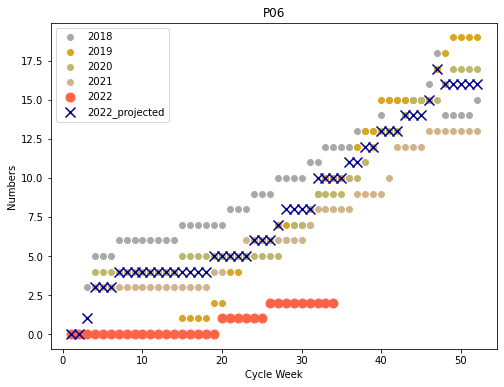

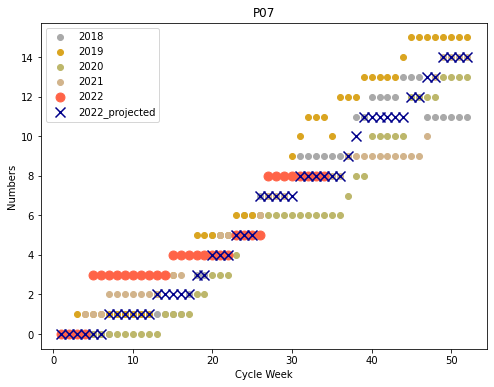

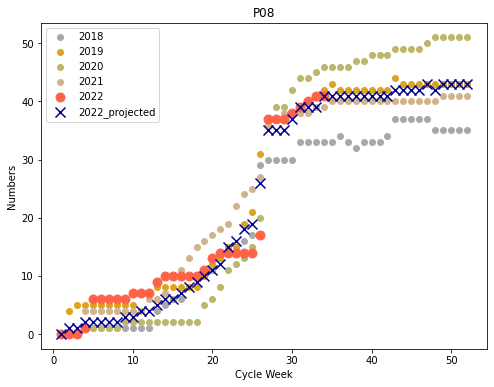

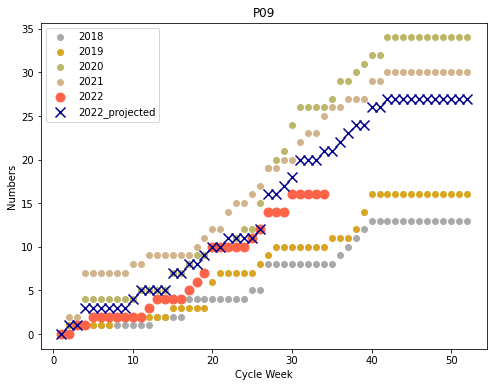

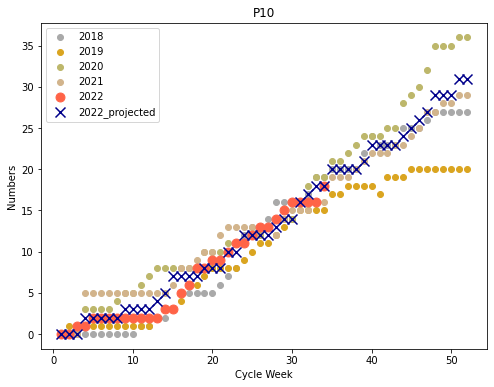

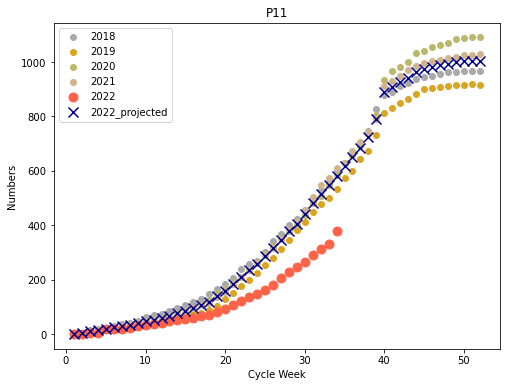

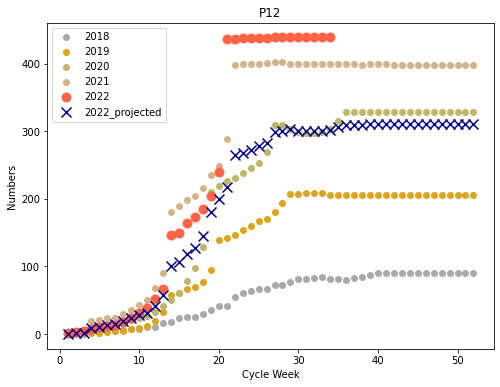

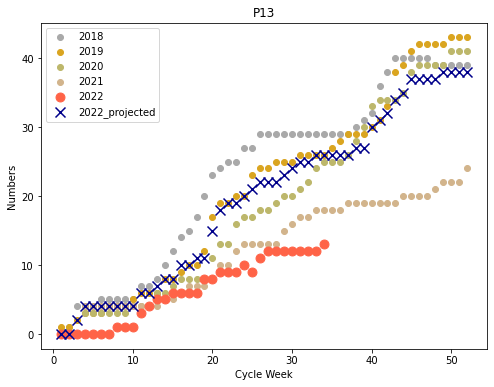

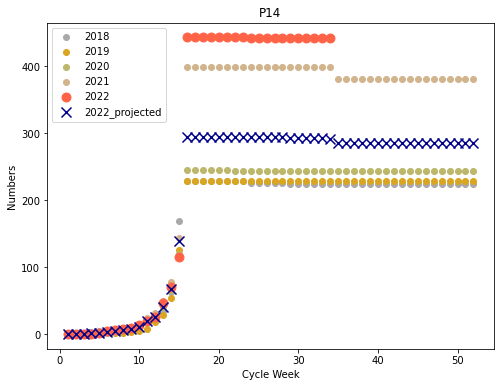

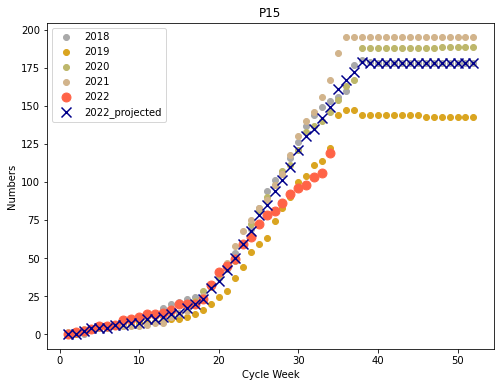

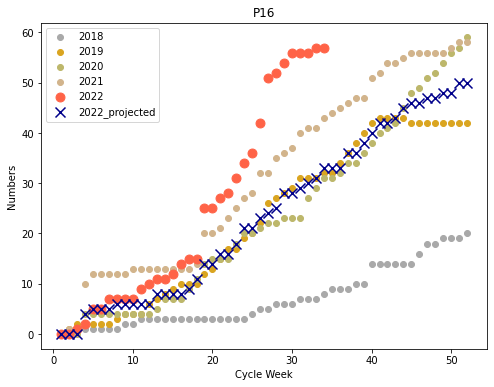

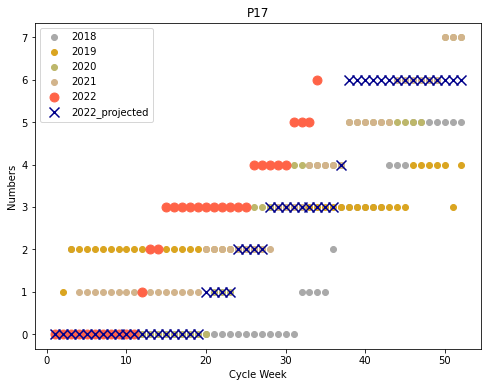

In [5]:
if __name__ == '__main__':
    data = pd.read_excel(r"E:\ABA\DATA_updated.xlsx")
    choice(data=data)
    predict(data=data)
    